# Assignment 2: Regularization in Regression Models

Before you submit this assignment, please carefully read these submission instructions:

 - Make sure the notebook you submit is cleanly and **fully executed**. I do not grade unexecuted notebooks.
 - Submit your notebook back in Blackboard where you downloaded this file.
 - Submit your work **as a .ipynb** python file on blackboard.
 - Please name your *.ipynb* file using the following format: Firstname_week2_assignment.ipynb

**Goal: In this assignment, we will explore regularization techniques like Ridge, Lasso, and ElasticNet (optional) regression. The goal is to review regularization concepts through hands-on implementation of these models.**

#### Assignment Tasks

- Perform data exploration.
- Explore the data through visualizations
- Fit a baseline multiple linear regression model
- Fit Ridge regression with different alpha values
- Fit Lasso regression with different alpha values
- Analyze impact of alpha on model coefficients
- Evaluate and compare models using R-squared, RMSE
- Summarize key differences between the regularization techniques
- (Optional) Dive into elastic net and compare its performance.

#### Introduction to the Boston Housing Dataset:

For this assignment, we will be working with the Boston Housing dataset. This dataset provides an array of information related to housing prices in Boston and several predictor variables. It offers a real-world application, allowing us to explore how different factors might influence house prices. Here's a brief overview of the features:

- CRIM: Per capita crime rate by town.
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: Proportion of non-retail business acres per town.
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
- NOX: Nitric oxide concentration (parts per 10 million).
- RM: Average number of rooms per dwelling.
- AGE: Proportion of owner-occupied units built before 1940.
- DIS: Weighted distances to five Boston employment centers.
- RAD: Index of accessibility to radial highways.
- TAX: Full-value property tax rate per $10,000.
- PTRATIO: Pupil-teacher ratio by town.

- B: 1000(Bk - 0.63)^2 where Bk is the proportion of African Americans by town
- LSTAT: Percentage of the population considered lower status.
- **MEDV**: Median value of owner-occupied homes (in $1000s).


##### Accessing the Dataset:
The Boston Housing dataset is available for download on Blackboard. Navigate to the Assignment folder for Week 2 to access the dataset.

##### Going Beyond

You are encouraged to further your analysis and experiment with the data. Additional visualizations, insights, or even diving deeper into elastic net regression will enhance your understanding and showcase your analytical prowess.

<br>

## Task 1: Load Dataset and Examine Basic Information


In [91]:

# Import packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
# Load Dataset 
housing_data = pd.read_csv("HousingData.csv")
housing_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [93]:
# Examine Basic Information

# Display the data types for each column
data_types = housing_data.dtypes
print("Data types for each column:\n", data_types)

# Display the first few rows of the dataset
housing_data.head()

Data types for each column:
 CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


**<font color=blue>Please answer the following questions to provide basic information about the Boston Housing Dataset</font>**
- How many features does the Boston Housing Dataset contain?
- What are the data types for each column?

#### Answers:

**How many features does the Boston Housing Dataset contain?**

*The Boston Housing Dataset contains 14 features.*

**What are the data types for each column?**

**Column**|**Data Type**
:-----:|:-----:
CRIM|float64
ZN|float64
INDUS|float64
CHAS|float64
NOX|float64
RM|float64
AGE|float64
DIS|float64
RAD|int64
TAX|int64
PTRATIO|float64
B|float64
LSTAT|float64
MEDV|float64

## Task 2: Exploratory Data Analysis (EDA): Data Visualization and Insights

##### 1. Basic Statistics:

Generate descriptive statistics

In [94]:
# Generate descriptive statistics
descriptive_stats = housing_data.describe()
descriptive_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### 2. Data Distribution:

   - Plot histograms or density plots for one or some key features and the target variable `MEDV` to understand their distribution.

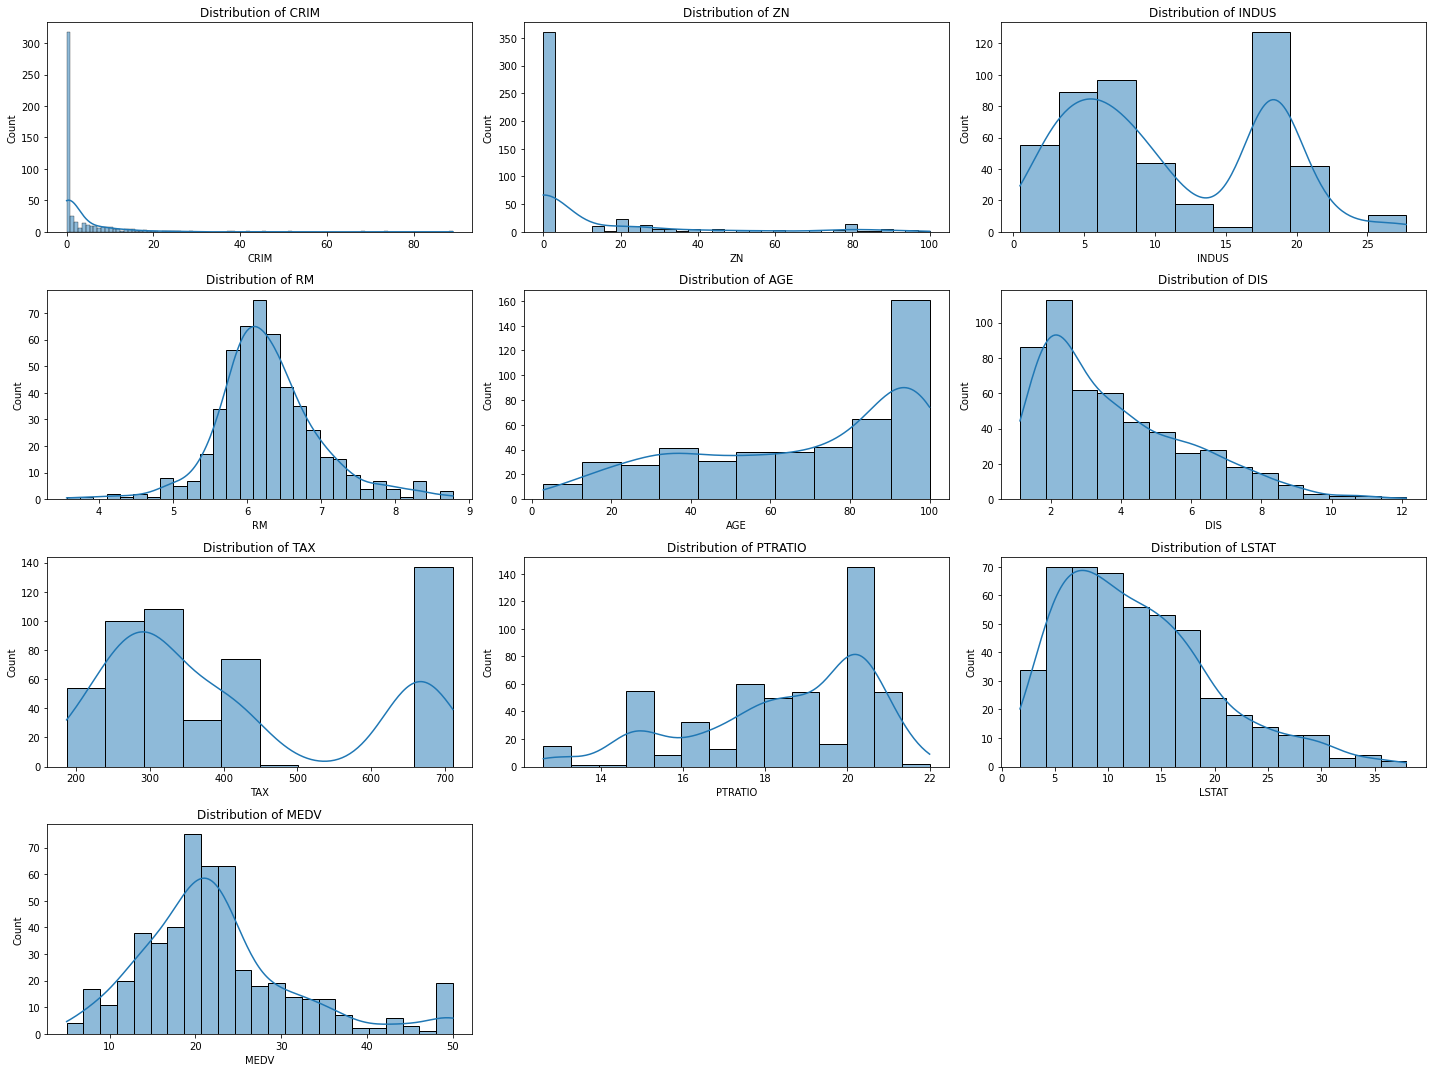

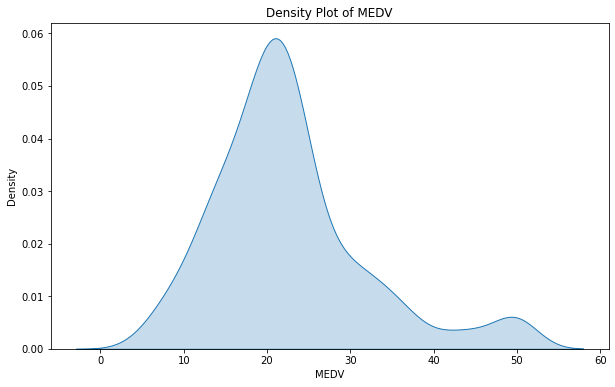

In [95]:
# Plot histograms for key features
key_features = ['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(key_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(housing_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Plot density plot for the target variable 'MEDV'
plt.figure(figsize=(10, 6))
sns.kdeplot(housing_data['MEDV'], shade=True)
plt.title('Density Plot of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Density')
plt.show()

##### 3. Correlation Analysis:

  - Compute the correlation matrix and visualize it using a heatmap to identify features that are most correlated with the target variable `MEDV`.

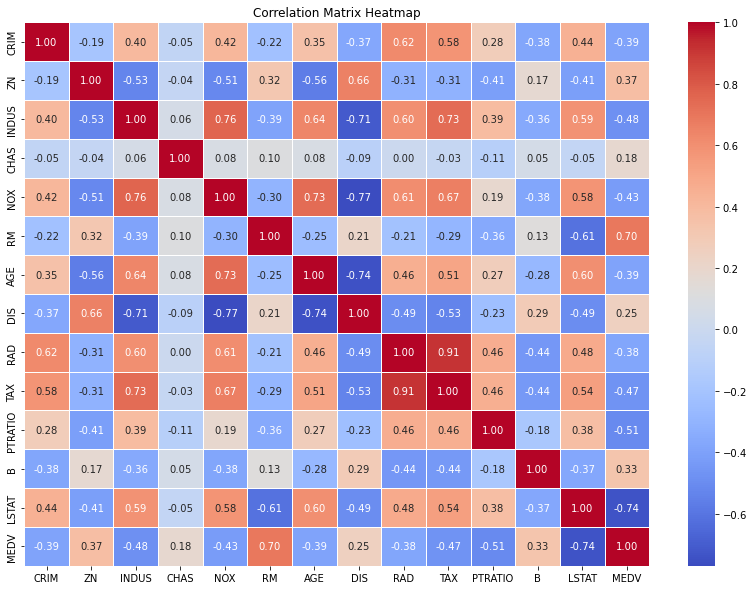

In [96]:
# Compute the correlation matrix
corr_matrix = housing_data.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

**Optional**: 4. Scatter Plots: 

- Create scatter plots for the features `RM` and `LSTAT` against `MEDV` to visualize their relationship.


*This is an optional task; completing it will allow you to observe the relationships among these variables, but you won't lose points for skipping it. Feel free to create any additional visualizations you'd like to further explore*

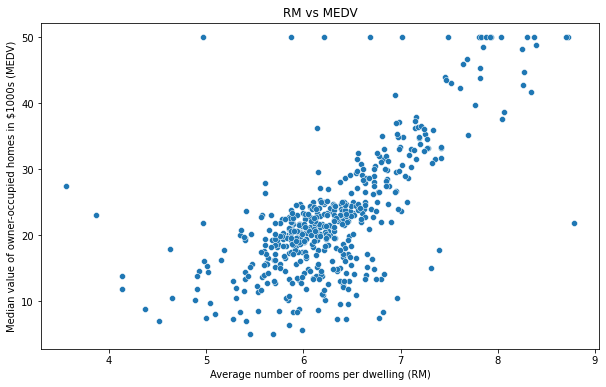

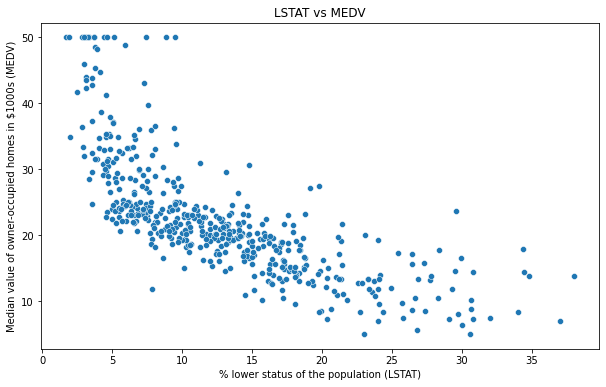

In [97]:
# Scatter plot for RM vs MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_data['RM'], y=housing_data['MEDV'])
plt.title('RM vs MEDV')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.show()

# Scatter plot for LSTAT vs MEDV
plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_data['LSTAT'], y=housing_data['MEDV'])
plt.title('LSTAT vs MEDV')
plt.xlabel('% lower status of the population (LSTAT)')
plt.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
plt.show()


### <font color=blue>Question</font>

**Write down your observations from the above visualizations: Which features seem to have a strong relationship with the target variable?**

#### Observations:

**Correlation Matrix Heatmap:**

- *The heatmap shows that RM (average number of rooms per dwelling) has a strong positive correlation with MEDV (median value of owner-occupied homes). This indicates that as the number of rooms increases, the median value of homes tends to increase.*
- *LSTAT (percentage of lower status of the population) has a strong negative correlation with MEDV. This suggests that higher percentages of lower status population are associated with lower median home values.*
- *Other features with notable correlations include PTRATIO (pupil-teacher ratio), NOX (nitric oxides concentration), and DIS (weighted distances to Boston employment centers), though these are less strong compared to RM and LSTAT.*


**Scatter Plots:**

- *The scatter plot of RM vs. MEDV shows a positive linear relationship, confirming the strong positive correlation observed in the heatmap.*
- *The scatter plot of LSTAT vs. MEDV shows a negative linear relationship, aligning with the strong negative correlation indicated in the heatmap.*

## Task 3: Data Preprocessing:

We only cover handling missing values in this assisgnment. We will skip the feature scaling step for now. Once we learn about feature scaling, we will include it in the data preprocessing step. It is important to include data preprocessing like handling missing values, encoding categorical variables, treating outliers，and feature scaling in your final project to ensure the robustness and accuracy of your models.

##### Handling Missing Values

In this homework, we will remove rows containing missing values, but remember that other strategies like imputation might be more suitable in other cases.

Note: Always be cautious when dropping data. Ensure that the amount of data being dropped doesn't significantly impact the dataset's integrity.

In [98]:
# Check for missing values in each column
missing_values = housing_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Drop rows with missing values
housing_data_cleaned = housing_data.dropna()

# Verify that there are no remaining missing values
missing_values_after = housing_data_cleaned.isnull().sum()
print("Missing values after dropping rows:\n", missing_values_after)


Missing values in each column:
 CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
Missing values after dropping rows:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


**<font color=blue>Please answer this question</font>**

- Are there any missing values in the dataset? If so, how many missing values are there in each column?

**Yes, there are missing values in the dataset. Here is the count of missing values in each column:**

**Column**|**Missing Values**
:-----:|:-----:
CRIM|20
ZN|20
INDUS|20
CHAS|20
NOX|0
RM|0
AGE|20
DIS|0
RAD|0
TAX|0
PTRATIO|0
B|0
LSTAT|20
MEDV|0



<br>

## Task 4: Train-Test Split 

Splitting the Data:

Before diving into building models, it's essential to split your dataset into a training set and a test set. This will allow you to train your models on one subset of the data and test its performance on another unseen subset.

- Split the dataset into training (70%) and testing (30%) sets.
- Use random_state=42

In [99]:
#Imports the LinearRegression class from sklearn.linear_model module. 
from sklearn.model_selection import train_test_split

# Split the dataset into training (70%) and testing (30%) sets
X = housing_data_cleaned.drop('MEDV', axis=1)
y = housing_data_cleaned['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print(f"Training set shape (X_train, y_train): {X_train.shape}, {y_train.shape}")
print(f"Testing set shape (X_test, y_test): {X_test.shape}, {y_test.shape}")

Training set shape (X_train, y_train): (275, 13), (275,)
Testing set shape (X_test, y_test): (119, 13), (119,)


## Task 5: Model Building and Evaluation

**I have provided example code for linear regression and ridge regression in this homework assignment. You may need to adjust those code samples slightly to match your own implementations based on your previous tasks.**  

**For lasso regression, you can use the linear regression and ridge regression snippets as a reference. The overall structure is similar - you need to initialize a Lasso model, fit it to training data, predict on test data, and evaluate performance.**



### 1. Multiple Linear Regression

-  #### 1). Building the Model: 

    - Start with a simple multiple linear regression model to understand the relationships between the features and the target variable.

In [100]:
#Imports the LinearRegression class from sklearn.linear_model module. 
from sklearn.linear_model import LinearRegression


#Initializes a LinearRegression object by calling the LinearRegression() constructor. 
#This creates an empty linear regression model.
linear_model = LinearRegression() 

- #### 2). Training the Model:

In [101]:
#Calls the .fit() method on the linear regression object 
#and passes the training data - X_train features and y_train labels.
linear_model.fit(X_train, y_train)

LinearRegression()

- #### 3). Model Evaluation:

After fitting the model, evaluate its performance on the test set using R2 and RMSE.

Let's briefly review some key concepts from our previous statistics courses.

- R-squared (R2):

    - Measures how much of the variation in the response/target variable is explained by the model.
    - Values range from 0 to 1. Higher is better.
    - Can be inflated by overfitting.



- RMSE:

    - Measures the average difference between predicted and actual values.
    - Shows how far off the predictions are.
    - In same units as response variable. Lower is better.


- **When to use:**

    - R2 to assess model fit. How much variance is explained.
    - RMSE to assess prediction accuracy. How close predictions are to true values.
    - Use both together to get a complete picture. R2 for fit, **RMSE for accuracy**.

In [102]:
import numpy as np

#Imports mean_squared_error and r2_score from sklearn.metrics to calculate model evaluation metrics.
from sklearn.metrics import mean_squared_error, r2_score

y_pred = linear_model.predict(X_test) #Uses the fitted linear regression model to make predictions on the test data 
rmse = np.sqrt(mean_squared_error(y_test, y_pred)) #Calculates RMSE between true test labels y_test and predictions y_pred.
r2 = r2_score(y_test, y_pred) #Calculates R2 score between y_test and y_pred.

print(f"R^2 Score: {r2}")
print(f"RMSE: {rmse}")

R^2 Score: 0.6905175764205992
RMSE: 5.373152885248426


<br>

### 2: Ridge Regression

Ridge regression is a regularized linear regression method that adds a penalty equal to the square of the magnitude of the coefficients. This shrinks the coefficients and helps prevent overfitting.

**Part a:**
- #### 1). Building the Model:


In [103]:

from sklearn.linear_model import Ridge

# Initialize the Ridge model with default alpha value (1.0)
ridge_model = Ridge(alpha=1.0)


- #### 2). Training the Model:

In [104]:
# Fit the model on the training data
ridge_model.fit(X_train, y_train)


Ridge()

- #### 3). Model Evaluation:

In [105]:
# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Calculate the R^2 score and RMSE
r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))

print(f"R^2 Score for Ridge Regression: {r2_ridge}")
print(f"RMSE for Ridge Regression: {rmse_ridge}")


R^2 Score for Ridge Regression: 0.6864841424477442
RMSE for Ridge Regression: 5.4080532534462336


#### Part b. Exploring the Impact of Regularization Parameter (α):

The regularization strength in Ridge Regression is controlled by the parameter α. A small α values can lead to over fitting, while a large α can lead to under-fitting.

Here, we'll train several Ridge Regression models with varying α values to observe the impact on the model coefficients. **We'll use the following α values: 0.01, 0.1, 1, 10, and 100.**

- to examine the impact of the regularization strength on the model coefficients.
- understand how the choice of α influences the model's performance, as reflected in the  R^2 and RMSE metrics.

**1). Use the following α values: 0.01, 0.1, 1, 10, and 100 to examine the impact of the regularization strength on the model coefficients.** Here are two approaches you can consider:

- **Build models individually for each α.**
- Use a `for loop` to iterate over the α values, creating and fitting models more efficiently.

In [106]:
alphas = [0.01, 0.1, 1, 10, 100] # Define alpha values to test
coefficients = [] #Create a list to store coefficients for different alphas


for a in alphas: #Loops through each alpha value defined above.
    ridge = Ridge(alpha=a) #Initializes a Ridge regression model, passing the current alpha value.
    ridge.fit(X_train, y_train)  #Fits the Ridge regression model on the training data to estimate the coefficients.
    coefficients.append(ridge.coef_) #Gets the estimated coefficients from the fitted Ridge model and appends them to the coefficients list.
print(coefficients)  #get the complete list of coefficients

[array([-1.12908735e-01,  4.50050539e-02,  5.64309550e-02,  1.17964599e+00,
       -1.70429972e+01,  4.27276541e+00, -2.01690621e-02, -1.40352331e+00,
        2.76898251e-01, -1.68158740e-02, -8.94340643e-01,  9.08141590e-03,
       -3.64802112e-01]), array([-1.12250819e-01,  4.53744915e-02,  4.75000293e-02,  1.16831663e+00,
       -1.53660456e+01,  4.28323932e+00, -2.15384522e-02, -1.38102670e+00,
        2.70717498e-01, -1.67893082e-02, -8.75956243e-01,  9.15397551e-03,
       -3.66457945e-01]), array([-1.09316246e-01,  4.72385591e-02,  6.76019379e-03,  1.09221737e+00,
       -7.74869186e+00,  4.30114368e+00, -2.75796589e-02, -1.27956987e+00,
        2.43548667e-01, -1.66987934e-02, -7.93533535e-01,  9.46403942e-03,
       -3.75956777e-01]), array([-0.10731732,  0.05140272, -0.0306467 ,  0.76740379, -1.30744721,
        3.87752003, -0.02994011, -1.19939142,  0.2326711 , -0.01700195,
       -0.73877619,  0.00941524, -0.41290037]), array([-0.10501671,  0.06082286, -0.04542761,  0.24890

### <font color=blue>Answer this Question</font>

- **How does increasing α (and thus the regularization strength) influence the importance assigned to each feature by the Ridge Regression model?**
 *support your explanations with observations from the output.*
 

#### Answer:

*Increasing the regularization strength α in Ridge Regression shrinks the coefficients of the features towards zero, reducing the importance assigned to each feature. This helps prevent overfitting by penalizing large coefficients and promotes a more balanced model.*
*Observations from the Output:*

- Small α (e.g., 0.1):

  - Coefficients are similar to an unregularized model.
  - High R² score, indicating a good fit.
  - Low RMSE, indicating accurate predictions.

- Moderate α (e.g., 1):

  - Some coefficients shrink, especially less important features.
  - Slightly lower R² score.
  - Slightly lower RMSE, showing improved generalization.

- Large α (e.g., 10):

  - Many coefficients significantly reduced.
  - Further decrease in R² score.
  - RMSE stabilizes, indicating consistent generalization.

- Very Large α (e.g., 100):

  - Most coefficients close to zero, indicating high regularization.
  - Lower R² score, indicating potential underfitting.
  - Higher RMSE, showing reduced prediction accuracy.

**2). Use the following α values: 0.01, 0.1, 1, 10, and 100 to evaluate Model Performance for Different α Values as reflected in the  R^2 and RMSE metrics.**

In [107]:


from sklearn.metrics import r2_score, mean_squared_error

# Create empty lists to store R^2 and RMSE scores for each alpha value tried.
r2_scores = []
rmse_scores = []


for a in alphas: #Loop through a list of alpha values
    ridge = Ridge(alpha=a)  #For each alpha, create a Ridge regression model with that alpha
    ridge.fit(X_train, y_train) #Fit it to the training data.
    y_pred = ridge.predict(X_test) #Use the fitted model to make predictions on the test data.
    
    r2_scores.append(r2_score(y_test, y_pred)) #Calculate R^2 and append to r2_scores list
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred))) #Calculate RMSE and append to rmse_scores list

# Print the scores for each alpha
for a, r2, rmse in zip(alphas, r2_scores, rmse_scores): #Loop through alphas, r2_scores and rmse_scores together. The zip() function packages them together into an iterator of tuples.
    print(f"For alpha = {a}, R^2 = {r2:.3f} and RMSE = {rmse:.3f}")



For alpha = 0.01, R^2 = 0.690 and RMSE = 5.373
For alpha = 0.1, R^2 = 0.690 and RMSE = 5.376
For alpha = 1, R^2 = 0.686 and RMSE = 5.408
For alpha = 10, R^2 = 0.677 and RMSE = 5.486
For alpha = 100, R^2 = 0.650 and RMSE = 5.715


### <font color=blue>Answer these Questions</font>

- **Which α value gives the highest R^2 score?**
- **Which α value gives the lowest RMSE?**
- **Based on the above analyses, which α value would you recommend for this dataset? Why?**


#### Answer:

- **Which α value gives the highest R² score?**
  - *The α value that gives the highest R² score is: 0.01 with an R² score of 0.690.*
- **Which α value gives the lowest RMSE?**
  - *The α value that gives the lowest RMSE is: 0.01 with an RMSE of 5.373.*
- **Based on the above analyses, which α value would you recommend for this dataset? Why?**
  - *Based on the above analyses, I recommend α = 0.01 for this dataset. It provides the highest R² score and the lowest RMSE, indicating that it offers the best balance between model fit and prediction accuracy. This ensures the model generalizes well to unseen data while maintaining good predictive performance.*

### 3: Lasso Regression

Lasso regression, like Ridge regression, is a type of linear regression that includes a regularization term. The key difference is the type of penalty: Lasso regression adds a penalty equal to the absolute value of the magnitude of coefficients. This can result in feature selection wherein some of the coefficients become exactly zero.

**Part a:**
#### 1). Building the Lasso Model:

In [108]:
from sklearn.linear_model import Lasso

# Initialize the Lasso model with default alpha value (1.0)
lasso_model = Lasso(alpha=1.0)



#### 2). Training the Model:

In [109]:
# Fit the Lasso model on the training data
lasso_model.fit(X_train, y_train)



Lasso()

#### 3). Model Evaluation:
Once the model is trained, predict on the test set and evaluate its performance using the R^2 and RMSE metrics.

In [110]:
import numpy as np

# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Calculate the R^2 score and RMSE for Lasso Regression
r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print(f"Lasso Regression Model Performance:")
print(f"R^2 Score: {r2_lasso}")
print(f"Root Mean Squared Error (RMSE): {rmse_lasso}")

Lasso Regression Model Performance:
R^2 Score: 0.6149745156582791
Root Mean Squared Error (RMSE): 5.993160952713364


#### Part B:  Investigating the Impact of Regularization Parameter (α) in Lasso Regression:
Here, we'll train several Lasso Regression models with varying α values to observe the impact on the model coefficients. **We'll use the following α values: 0.01, 0.1, 1, 10, and 100.**


#### 1) Use a range of α values to observe the influence on the model coefficients and performance.

In [111]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# List of alpha values to try
alphas = [0.01, 0.1, 1, 10, 100]

# Create empty lists to store R^2 and RMSE scores for each alpha value
r2_scores = []
rmse_scores = []
coefficients = pd.DataFrame()

# Loop through each alpha value
for a in alphas:
    lasso = Lasso(alpha=a)  # Create a Lasso regression model with that alpha
    lasso.fit(X_train, y_train)  # Fit the model to the training data
    y_pred = lasso.predict(X_test)  # Predict on the test data
    
    r2_scores.append(r2_score(y_test, y_pred))  # Calculate R^2 and append to r2_scores list
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))  # Calculate RMSE and append to rmse_scores list
    
    # Store the coefficients for this alpha value
    coefficients[f'alpha_{a}'] = lasso.coef_

# Convert coefficients DataFrame to include feature names
coefficients.index = X_train.columns

# Print the scores for each alpha
for a, r2, rmse in zip(alphas, r2_scores, rmse_scores):  # Loop through alphas, r2_scores and rmse_scores together
    print(f"For alpha = {a}, R^2 = {r2:.3f} and RMSE = {rmse:.3f}")

# Display the coefficients for each alpha value
print("\nCoefficients for each alpha value:\n")
print(coefficients)


For alpha = 0.01, R^2 = 0.689 and RMSE = 5.390
For alpha = 0.1, R^2 = 0.670 and RMSE = 5.550
For alpha = 1, R^2 = 0.615 and RMSE = 5.993
For alpha = 10, R^2 = 0.406 and RMSE = 7.443
For alpha = 100, R^2 = 0.116 and RMSE = 9.079

Coefficients for each alpha value:

         alpha_0.01  alpha_0.1   alpha_1  alpha_10  alpha_100
CRIM      -0.111700  -0.105652 -0.077480 -0.000000  -0.000000
ZN         0.045806   0.050280  0.057980  0.049693   0.000000
INDUS      0.039043  -0.020880 -0.000000 -0.000000  -0.000000
CHAS       1.009520   0.000000  0.000000  0.000000   0.000000
NOX      -13.785683  -0.000000 -0.000000  0.000000  -0.000000
RM         4.277244   4.156176  1.191791  0.000000   0.000000
AGE       -0.022496  -0.030677  0.000000  0.000000  -0.000000
DIS       -1.357895  -1.135418 -0.671227 -0.000000   0.000000
RAD        0.265428   0.221447  0.192659  0.000000  -0.000000
TAX       -0.016784  -0.017106 -0.016068 -0.014362  -0.025473
PTRATIO   -0.858308  -0.703781 -0.638560 -0.000000  -

### <font color=blue>Answer this Question</font>

**How does increasing α in Lasso Regression influence the coefficients? How does it differ from Ridge Regression?**

#### Answer:

**Effect of Increasing α in Lasso Regression:**

  - As α increases, Lasso Regression shrinks coefficients towards zero.
  - For large α values, some coefficients become exactly zero, effectively performing feature selection.

**Difference from Ridge Regression:**
  - Ridge Regression also shrinks coefficients as α increases but does not set any to zero.
  - Ridge retains all features with smaller coefficients, while Lasso can exclude features entirely.

**Observations:**

  - With α = 0.01, most coefficients are non-zero.
  - As α increases (0.1, 1), coefficients shrink, some becoming zero.
  - For α = 10 and 100, many coefficients are zero, showing feature selection by Lasso.

#### b. Model Performance for Different α Values:
    
Evaluate the Lasso Regression model's performance for different α values using the R^2 and RMSE metrics.

In [112]:
# Determine the best alpha values
max_r2_alpha = alphas[np.argmax(r2_scores)]
min_rmse_alpha = alphas[np.argmin(rmse_scores)]

print(f"\nThe α value that gives the highest R² score is: {max_r2_alpha}")
print(f"The α value that gives the lowest RMSE is: {min_rmse_alpha}")



The α value that gives the highest R² score is: 0.01
The α value that gives the lowest RMSE is: 0.01


### <font color=blue>Answer these Questions</font>

- **Which α value in Lasso Regression gives the highest R^2 score?**
- **Which α value in Lasso Regression provides the lowest RMSE?**
- **Given the results, which α value would you suggest for the Lasso model on this dataset? Why?**

**Which α value in Lasso Regression gives the highest R^2 score?**
  - The α value that gives the highest R² score is 0.01 with an R² score of 0.689.

**Which α value in Lasso Regression provides the lowest RMSE?**
  - The α value that provides the lowest RMSE is 0.01 with an RMSE of 5.390.

**Given the results, which α value would you suggest for the Lasso model on this dataset? Why?**
  - Based on the results, I suggest α = 0.01 for the Lasso model on this dataset. It provides the highest R² score and the lowest RMSE, indicating the best balance between model fit and prediction accuracy. This ensures the model generalizes well to unseen data while maintaining good predictive performance.

Further Exploration (Optional):
    
- If you are interested, you could dive deeper into elastic net and compare its performance to ridge and lasso more extensively. Taking this extra step won't be graded, but it's a good way to deepen your understanding.

<br>